In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("d:/dataset/analysis/restaurant.csv")
df

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Day Wise customer Summary :

In [3]:
total_cus=df.day.value_counts()
total_cus

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

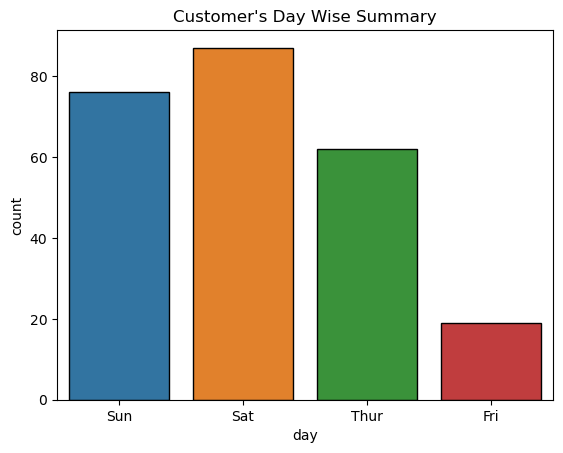

In [4]:
sb.countplot(x=df.day,edgecolor='k')
plt.title("Customer's Day Wise Summary")
plt.show()

#### Total Customer's Lunch and Dinner wise details ??

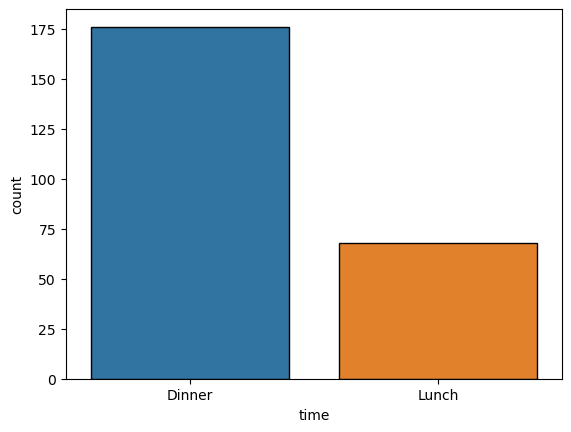

In [5]:
sb.countplot(x=df.time,edgecolor='k')
plt.show()

#### Time and Day wise summary

In [6]:
group_df=df.groupby(by=["day","time"])[["day"]].count()
group_df

day
day  time       
Fri  Dinner   12
     Lunch     7
Sat  Dinner   87
Sun  Dinner   76
Thur Dinner    1
     Lunch    61

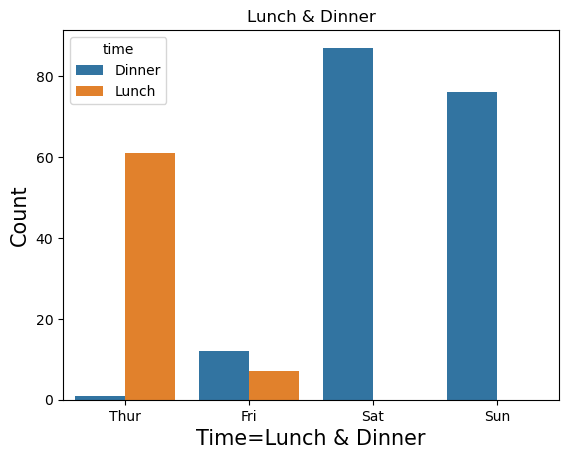

In [7]:
sb.countplot(x=df.day,hue=df.time,order=["Thur","Fri","Sat","Sun"])
plt.xlabel("Time=Lunch & Dinner",size=15)
plt.ylabel("Count",size=15)
plt.title("Lunch & Dinner")
plt.show()

#### Gender wise customer Summary:

In [8]:
gndr=df.groupby(by=['day','gender'])[['day']].count()
gndr

day
day  gender     
Fri  Female    9
     Male     10
Sat  Female   28
     Male     59
Sun  Female   18
     Male     58
Thur Female   32
     Male     30

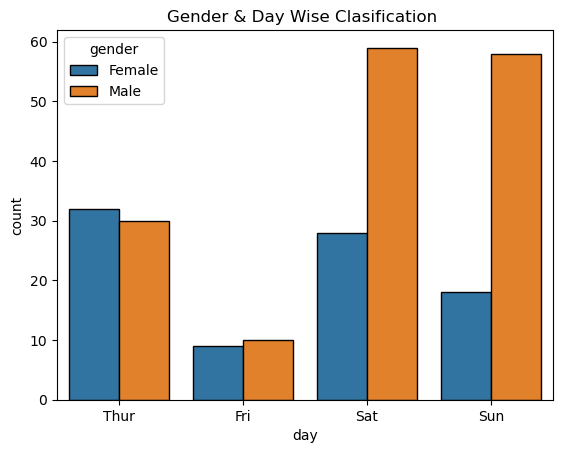

In [9]:
sb.countplot(x=df.day,hue=df.gender,order=["Thur","Fri","Sat","Sun"],edgecolor='k')
plt.title("Gender & Day Wise Clasification ")
plt.show()

#### Total Bill :

In [10]:
sum_of_totalbill=df.total_bill.sum()
sum_of_totalbill

4827.77

#### Summary details of Total_Bill days wise Calculation:

In [11]:
oper=df.groupby(by=["day"])[["total_bill"]].agg(["count","max","min","sum","mean","std"])
oper

total_bill                                           
          count    max   min      sum       mean       std
day                                                       
Fri          19  40.17  5.75   325.88  17.151579  8.302660
Sat          87  50.81  3.07  1778.40  20.441379  9.480419
Sun          76  48.17  7.25  1627.16  21.410000  8.832122
Thur         62  43.11  7.51  1096.33  17.682742  7.886170

#### Day & Time wise Total Bill:

In [12]:
day_collection_bill=df.groupby(by=["day","time"])[["total_bill"]].sum()
day_collection_bill

total_bill
day  time              
Fri  Dinner      235.96
     Lunch        89.92
Sat  Dinner     1778.40
Sun  Dinner     1627.16
Thur Dinner       18.78
     Lunch      1077.55

#### Details of Total Bill, Tip & Size wise : 

In [13]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Total Tip

In [14]:
df.tip.sum()

731.5799999999999

#### Sum of Tip day & Time wise

In [16]:
sum_tip_times=df.groupby(by=['day','time'])[['tip']].sum()
sum_tip_times

tip
day  time          
Fri  Dinner   35.28
     Lunch    16.68
Sat  Dinner  260.40
Sun  Dinner  247.39
Thur Dinner    3.00
     Lunch   168.83

### Add Tax 

In [17]:
def cal_tax (bill):
    if(bill<10):
        return bill*.05
    elif(bill>10 and bill>20):
        return bill*.10
    else:
        return bill*.15

In [18]:
cal_tax(20)

3.0

### Add Tax Column

In [23]:
df['tax']=df.total_bill.apply(cal_tax)
df

,total_bill,tip,gender,smoker,day,time,size,tax
0,16.99,1.01,Female,No,Sun,Dinner,2,2.5485
1,10.34,1.66,Male,No,Sun,Dinner,3,1.5510
2,21.01,3.50,Male,No,Sun,Dinner,3,2.1010
3,23.68,3.31,Male,No,Sun,Dinner,2,2.3680
4,24.59,3.61,Female,No,Sun,Dinner,4,2.4590
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.9030
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.7180
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.2670
242,17.82,1.75,Male,No,Sat,Dinner,2,2.6730


### Final Bill

In [24]:
df['Final_Bill']=df.total_bill+df.tax
df

,total_bill,tip,gender,smoker,day,time,size,tax,Final_Bill
0,16.99,1.01,Female,No,Sun,Dinner,2,2.5485,19.5385
1,10.34,1.66,Male,No,Sun,Dinner,3,1.5510,11.8910
2,21.01,3.50,Male,No,Sun,Dinner,3,2.1010,23.1110
3,23.68,3.31,Male,No,Sun,Dinner,2,2.3680,26.0480
4,24.59,3.61,Female,No,Sun,Dinner,4,2.4590,27.0490
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.9030,31.9330
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.7180,29.8980
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.2670,24.9370
242,17.82,1.75,Male,No,Sat,Dinner,2,2.6730,20.4930


### Total Sum Of Final Bill

In [26]:
sum_of_final_bill=df.Final_Bill.sum()
sum_of_final_bill

5400.332